# FFT and derivative

在這裡我們要介紹如何以 FFT 來估算一個函數的微分.

In [1]:
using FFTW
using LinearAlgebra
using Plots

## Section 0

簡單來說, 一個週期為 $L$ 的函數可寫成三角函數的展開
$$
f(x) = \sum^{\infty}_{k=-\infty} \hat{f}_k e^{\frac{2\pi i}{L}kx},
$$
其中 $\hat{f}_k$ 稱之為傅立葉係數 (fourier coefficients). 

從上式可以很簡單看出來, 
$$
f'(x) = \sum^{\infty}_{k=-\infty} \left(\frac{2\pi i}{L}k\right)\hat{f}_k e^{\frac{2\pi i}{L}kx}.
$$
也就是說, 給定一個函數 $f$, 我們若能算出他的傅立葉係數 $\hat{f}_k$, 那將這些係數乘以 $\frac{2\pi i}{L}k$ 就會得到 $f'$ 的傅立葉係數. 因此就可以得出 $f'$. 

## Section 1

首先我們用 $y = \sin(x)$ 和 $y = \cos(x)$ 來看看 fft 是怎麼運作的。

$\sin(x)$ 是一個週期函數，週期是 $2\pi$:

1. 我們在 $[0, 2\pi]$ 之間取 $N+1$ 個點。於是我們有 
`x=range(0,stop=2*pi,length=N+1)`; 到這裡，$x$ 是一個長度為 $N+1$ 的向量，最小值是 $0$，最大值是 $2\pi$。

2. 必須注意的是 $\sin(0)$ 和 $\sin(2\pi)$ 指的是相同的點，他們都等於 $0$。所以我們要把 $x$ 向量的最後一個點去掉，即 `x=x[1:N]`;

In [2]:
N = 100;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];

接著我們計算 $y = \sin(x)$ 的傅立葉係數。

1. 先求出 $\sin(x)$ 的值, 並儲存在變數 fs 中. 由於 x 是一個向量, 因此要用 `fs=sin.(x)`, 而不是 `fs=sin(x)`;
2. 將 fs 轉成傅立葉係數，並儲存在 fs_hat 中。
3. 用 plot 指令畫出係數中虛部的部分。

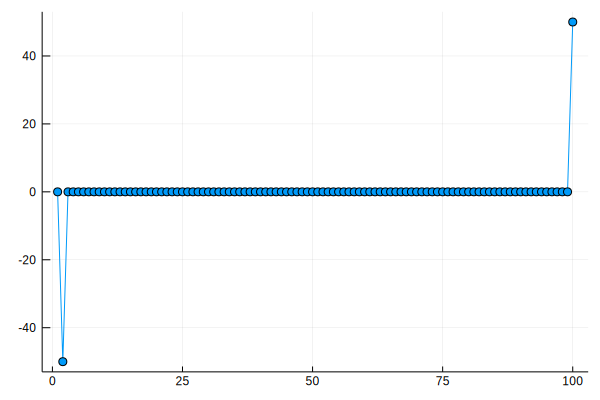

In [3]:
fs = sin.(x);
fs_hat = fft(fs);
plot(imag(fs_hat), marker=:circle, leg=false)

我們稍微計算一下，根據 Euler's formula，$\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2}(-ie^{i\theta} + ie^{-i\theta})$

* 數學上，離散傅立葉轉換的公式是這樣的：

傅立葉係數為 
$$\hat{f}_{k} = \frac{2 \pi}{N} \sum_{j = 1}^{N} e^{-i k x_j} f_j,$$ 
其中 $N$ 為 $[0,2\pi)$ 間點的個數。

而 ifft($\hat{f}$) 為 
$${f}_{j} = \frac{1}{2 \pi} \sum_{k = -N/2 + 1}^{N/2} e^{i k x_j} \hat{f}_{k}.$$

再和離散傅立葉轉換的公式相對照，$\sin(\theta) = \frac{1}{2}(-ie^{i\theta} + ie^{-i\theta}) = \frac{1}{2 \pi}(-i \pi e^{i\theta} + i \pi e^{-i\theta} )$，可得傅立葉係數 $\hat{f}_1 = -i \pi$, $\hat{f}_{-1} = i \pi$，其他係數為零。

* 而 Julia 中 fft(f) 與 ifft(fft(f)) 的運作方式是：

傅立葉係數(fft(f))為 
$$\hat{f}_{k} = \sum_{j = 1}^{N} e^{-i k x_j} f_j,$$ 
其中 $N$ 為 $[0,2\pi)$ 間點的個數。

而 ifft($\hat{f}$) 為 
$${f}_{j} = \frac{1}{N} \sum_{k = -N/2 + 1}^{N/2} e^{i k x_j} \hat{f}_{k}.$$

由 $\sin(\theta) = \frac{1}{2}(-ie^{i\theta} + ie^{-i\theta}) = \frac{1}{N}(\frac{-i N}{2} e^{i\theta} + \frac{i N}{2} e^{-i\theta} )$，可得傅立葉係數 $\hat{f}_1 = \frac{-i N}{2}$, $\hat{f}_{-1} = \frac{i N}{2}$，其他係數為零。

最後將係數畫出來, 我們用 imag 指令畫出傅立葉係數的虛部, 會看到兩個峰值其值為 $\pm 50$.

接著我們計算 $y = \cos(x)$ 的傅立葉係數。
1. 先求出 $\cos(x)$ 的值，並儲存在變數 fc 中。
2. 將 fc 轉成傅立葉係數，並儲存在 fc_hat 中。
3. 用 plot 指令畫出係數中實部的部分。

根據 Euler's formula，$\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2} = \frac{1}{2}(ie^{i\theta} + ie^{-i\theta})$

再和離散傅立葉轉換的公式相對照，可得傅立葉係數 $\hat{f}_{1} = \frac{N}{2}$, $\hat{f}_{-1} = \frac{N}{2}$，其他係數為零。

最後將係數畫出來，我們用 real 指令畫出傅立葉係數的實部，會看到兩個峰值其值皆為 $50$.

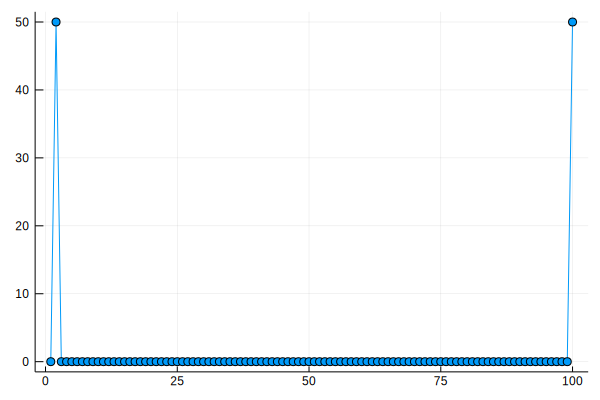

In [4]:
fc = cos.(x);
fc_hat = fft(fc);
plot(real(fc_hat), marker=:circle, leg=false)

由上面兩個例子我們還可以看出一件事, 就是傅立葉係數的排序. 

當 N 為偶數時，傅立葉係數的排序為 $\hat{f}_0, \hat{f}_1, \hat{f}_2, ...\hat{f}_{N/2 -1}, \hat{f}_{N/2}, \hat{f}_{-N/2 +1}, ..., \hat{f}_{-2}, \hat{f}_{-1}$.

當 N 為奇數時，傅立葉係數的排序為 $\hat{f}_0, \hat{f}_1, \hat{f}_2, ...\hat{f}_{(N-1)/2}, \hat{f}_{- (N-1)/2}, ..., \hat{f}_{-2}, \hat{f}_{-1}$.

## Section 2: 一次微分與二次微分
當我們知道傅立葉係數的排法後，就可以利用傅立葉係數做函數的微分。因為點數為奇數或偶數，傅立葉係數排法會不同，因此微分的做法也有些不同。
詳細的理論推導請參考以下的文件，在這裡我們只演示幾個微分的例子。

[Notes on FFT-based differentiation](https://math.mit.edu/~stevenj/fft-deriv.pdf?fbclid=IwAR2q8DNJ1avY1iBeJCbxC-qUlF_6CpBOVxZSmKeDOLdvEfhzNVn5aMJLVBc)

### Section 2.1: $N$ 為偶數時的一次微分

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則 

    當 $ k \neq \frac{N}{2}$ 時，將 $\hat{f}_k$ 乘上 $\frac{2\pi i}{L} k$，其中 $L$ 為函數的週期
    
    當 $ k = \frac{N}{2}$ 時，將 $\hat{f}_{N/2}$ 乘上 $ 0 $

    就可以得到微分後的傅立葉係數。

由於傅立葉係數取出來是一個向量，因此我們將上述微分的法則也寫成向量，運算比較方便。下列的例子我們取 $f(x) = \sin(x)$，$N = 20$ 試試。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來，並且在 $\hat{f}_{N/2}$ 的位置填 0。

$$ 0, 1, 2, ..., \frac{N}{2} -2, \frac{N}{2} -1, 0, -\frac{N}{2}+1, -\frac{N}{2} +2, ..., -2, -1$$

(step 3) 將傅立葉係數的編號乘上 $\frac{2\pi i}{L}$，其中函數週期 $L = 2 \pi $。就可以得到微分算子。

(step 4) 將傅立葉係數乘上微分算子，就可以得到微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

在下圖中我們比較數值計算微分以及真實解看差多少. 左圖是值的比較, 右圖是將兩個相減取絕對值看差多少, 可以看到誤差大約是 $10^{-15}$.

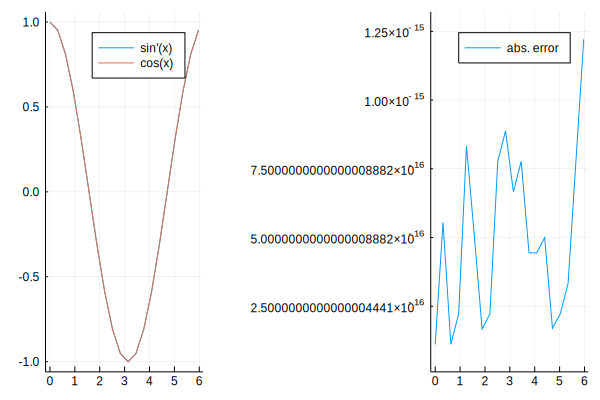

In [5]:
# (step 1)

N = 20; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
fs = sin.(x);
fc = cos.(x);
fs_hat = fft(fs);

# (step 2)

k_mode = collect(0:N/2-1);
k_mode = push!(k_mode, 0.0);
k_mode = append!(k_mode, collect(-N/2+1:-1));

# (step 3)

diff1 = (2*pi/L)*im*k_mode;

# (step 4)

pf_hat = fs_hat.*diff1;
pf = ifft(pf_hat);

p1 = plot(x, real(pf), label="sin'(x)")
plot!(p1, x, fc, label="cos(x)")
p2 = plot(x, abs.(real(pf)-fc), label="abs. error")
plot(p1, p2, layout=(1,2))

### Section 2.2: $N$ 為偶數時的二次微分

需注意的是 "二次微分" 並不是 "一次微分" 做兩次. 

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則將 $\hat{f}_k$ 乘上 $-(\frac{2\pi}{L} k)^2$ 就可以得到微分後的傅立葉係數，其中 $L$ 為函數的週期。

我們將上述二次微分的法則寫成向量，下列的例子我們取 $f(x) = \sin(x)$，$N = 20$。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來。
$$ 0, 1, 2, ..., \frac{N}{2} -2, \frac{N}{2} -1, \frac{N}{2}, -\frac{N}{2}+1, -\frac{N}{2} +2, ..., -2, -1$$

    **NOTE** 這裏 Nyquist mode 並不設為 0.

(step 3) 先將傅立葉係數的編號平方，再乘上 $-(\frac{2\pi}{L})^2$，其中函數週期 $L = 2 \pi $。就可以得到二次微分算子。

(step 4) 將傅立葉係數乘二次上微分算子，就可以得到二次微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

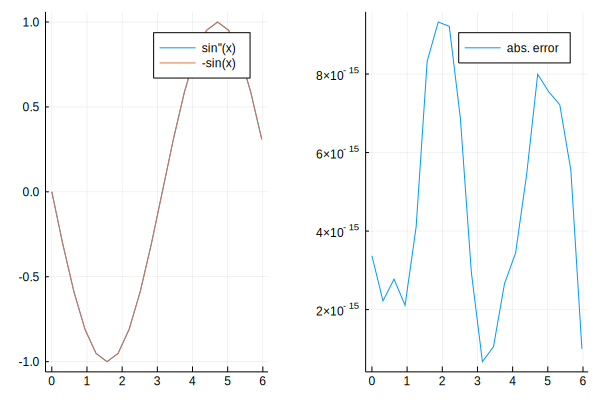

In [6]:
# (step 1)

N = 20; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
fs = sin.(x);
fs_hat = fft(fs);

# (step 2)

k_mode = collect(0:N/2);
k_mode = append!(k_mode, collect(-N/2+1:-1));

# (step 3)

diff2 = -(2*pi/L)^2*k_mode.^2;

# (step 4)

ppf_hat = fs_hat.*diff2;
ppf = ifft(ppf_hat);

p1 = plot(x, real(ppf), label="sin''(x)")
plot!(p1, x, -fs, label="-sin(x)")
p2 = plot(x, abs.(real(ppf)+fs), label="abs. error")
plot(p1, p2, layout=(1,2))

### Section 2.3: $N$ 為奇數時的一次微分

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則將 $\hat{f}_k$ 乘上 $\frac{2\pi i}{L} k $ 就可以得到微分後的傅立葉係數，其中 $L$ 為函數的週期。

我們將上述微分的法則寫成向量，運算比較方便。下列的例子我們取 $f(x) = \sin(x)$，$N = 19$ 試試。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來， $$ 0, 1, 2, ..., \frac{N-1}{2}, -\frac{N-1}{2}, -\frac{N-1}{2} +1, ..., -2, -1$$

(step 3) 將傅立葉係數的編號乘上 $\frac{2\pi i}{L}$，其中函數週期 $L = 2 \pi $。就可以得到微分算子。

(step 4) 將傅立葉係數乘上微分算子，就可以得到微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

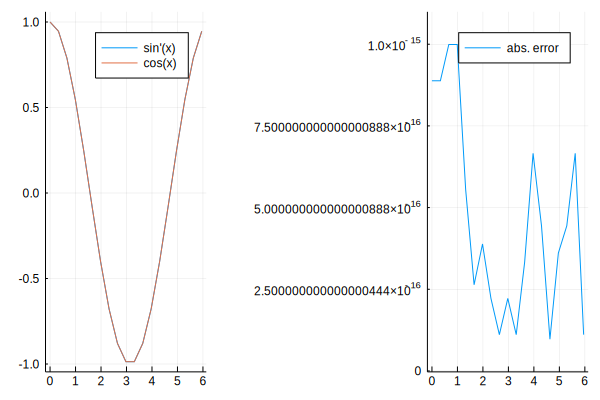

In [7]:
# (step 1)

N = 19; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
fs = sin.(x);
fc = cos.(x);
fs_hat = fft(fs);

# (step 2)

k_mode = collect(0:(N-1)/2);
k_mode = append!(k_mode, collect(-(N-1)/2:-1));

# (step 3)

diff1 = (2*pi/L)*im*k_mode;

# (step 4)

pf_hat = fs_hat.*diff1;
pf = ifft(pf_hat);

p1 = plot(x, real(pf), label="sin'(x)")
plot!(p1, x, fc, label="cos(x)")
p2 = plot(x, abs.(real(pf)-fc), label="abs. error")
plot(p1, p2, layout=(1,2))

### Section 2.4: $N$ 為奇數時的二次微分

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則將 $\hat{f}_k$ 乘上 $-(\frac{2\pi }{L} k)^2 $ 就可以得到二次微分後的傅立葉係數，其中 $L$ 為函數的週期。

我們將上述微分的法則寫成向量，運算比較方便。下列的例子我們取 $f(x) = \sin(x)$，$N = 19$ 試試。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來， $$ 0, 1, 2, ..., \frac{N-1}{2}, -\frac{N-1}{2}, -\frac{N-1}{2} +1, ..., -2, -1$$

(step 3) 先將傅立葉係數的編號平方，再乘上 $-(\frac{2\pi }{L})^2$，其中函數週期 $L = 2 \pi $。就可以得到二次微分算子。

(step 4) 將傅立葉係數乘上二次微分算子，就可以得到二次微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

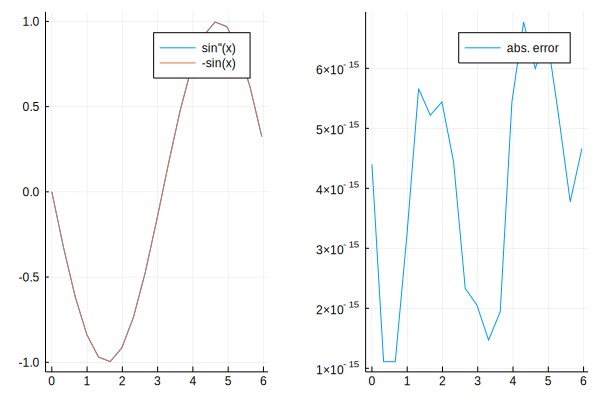

In [8]:
# (step 1)

N = 19; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
fs = sin.(x);
fs_hat = fft(fs);

# (step 2)

k_mode= collect(0:(N-1)/2);
k_mode = append!(k_mode, collect(-(N-1)/2:-1));

# (step 3)

diff2 = -(2*pi/L)^2*k_mode.^2;

# (step 4)

ppf_hat = fs_hat.*diff2;
ppf = ifft(ppf_hat);

p1 = plot(x, real(ppf), label="sin''(x)")
plot!(p1, x, -fs, label="-sin(x)")
p2 = plot(x, abs.(real(ppf)+fs), label="abs. error")
plot(p1, p2, layout=(1,2))